In [1]:
!pip install pandas matplotlib seaborn

  Using cached pandas-2.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (91 kB)
  Using cached matplotlib-3.10.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached numpy-2.3.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.4-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (106 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.2.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (8.9 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.3.0-cp311

In [3]:
# ИСПРАВЛЕННАЯ ВЕРСИЯ ЯЧЕЙКИ

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

# Загружаем модуль для разбиения на предложения (punkt)
# Теперь мы ловим правильную ошибку - LookupError
try:
    nltk.data.find('tokenizers/punkt')
    print("Ресурс 'punkt' уже загружен.")
except LookupError:
    print("Ресурс 'punkt' не найден. Начинаю загрузку...")
    nltk.download('punkt')
    print("Загрузка 'punkt' завершена.")

# --- Остальной код остается без изменений ---

# Читаем наш текстовый файл
with open('milinda.txt', 'r', encoding='windows-1251') as file:
    raw_text = file.read()

# Разбиваем текст на предложения. Указываем язык для лучшего качества.
sentences = nltk.sent_tokenize(raw_text, language='russian')

# Создаем DataFrame
df = pd.DataFrame(sentences, columns=['original_sentence'])

# Выводим первые 5 строк нашей таблицы, чтобы посмотреть, что получилось
df.head()

Ресурс 'punkt' не найден. Начинаю загрузку...


[nltk_data] Downloading package punkt to /home/srtbtlr/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Загрузка 'punkt' завершена.


,original_sentence
0,"Спасибо, что скачали книгу в бесплатной электр..."
1,Вопросы Милинды\n\n\n\n\nПЕРЕВОД\n\n\n\n\nКНИГ...
2,ВНЕШНЕЕ ПОВЕСТВОВАНИЕ\n\n\n\nПоклон\n\nБлаженн...
3,"В славном городе Сагале{2}: #c2царь, Милинда п..."
4,"Пришел царь к красноречивому тьмы гонителю,\n\..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8550 entries, 0 to 8549
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   original_sentence  8550 non-null   object
dtypes: object(1)
memory usage: 66.9+ KB


In [8]:
df['sentence_length'] = df['original_sentence'].apply(len)
df.head()

,original_sentence,sentence_length
0,"Спасибо, что скачали книгу в бесплатной электр...",274
1,Вопросы Милинды\n\n\n\n\nПЕРЕВОД\n\n\n\n\nКНИГ...,45
2,ВНЕШНЕЕ ПОВЕСТВОВАНИЕ\n\n\n\nПоклон\n\nБлаженн...,85
3,"В славном городе Сагале{2}: #c2царь, Милинда п...",119
4,"Пришел царь к красноречивому тьмы гонителю,\n\...",116


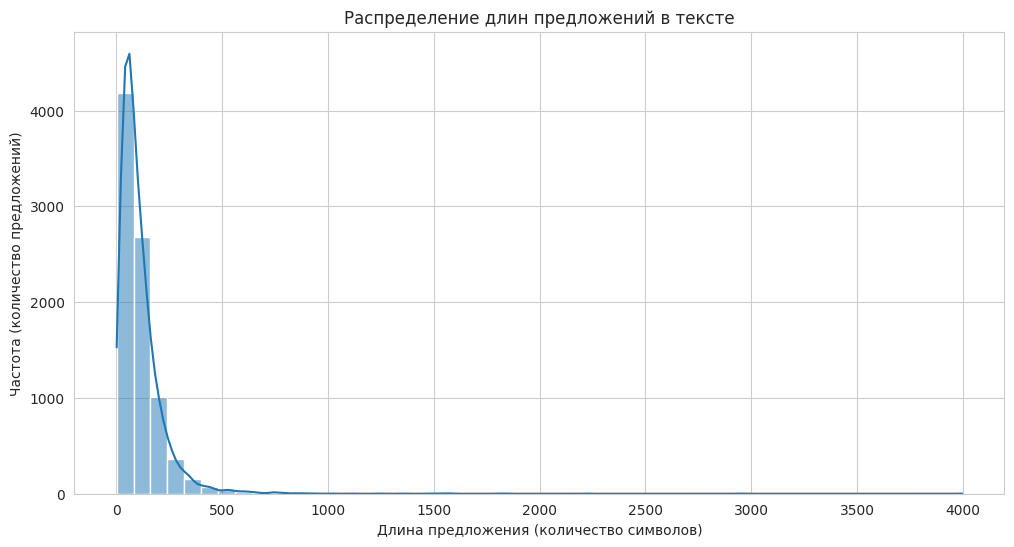

In [9]:
# Устанавливаем стиль для графиков
sns.set_style('whitegrid')

# Задаем размер графика
plt.figure(figsize=(12, 6))

# Строим гистограмму
sns.histplot(data=df, x='sentence_length', bins=50, kde=True)

# Добавляем заголовок и подписи осей
plt.title('Распределение длин предложений в тексте')
plt.xlabel('Длина предложения (количество символов)')
plt.ylabel('Частота (количество предложений)')

# Показываем график
plt.show()

Средняя длина предложения: 112.19 символов
Медианная длина предложения: 84.00 символов


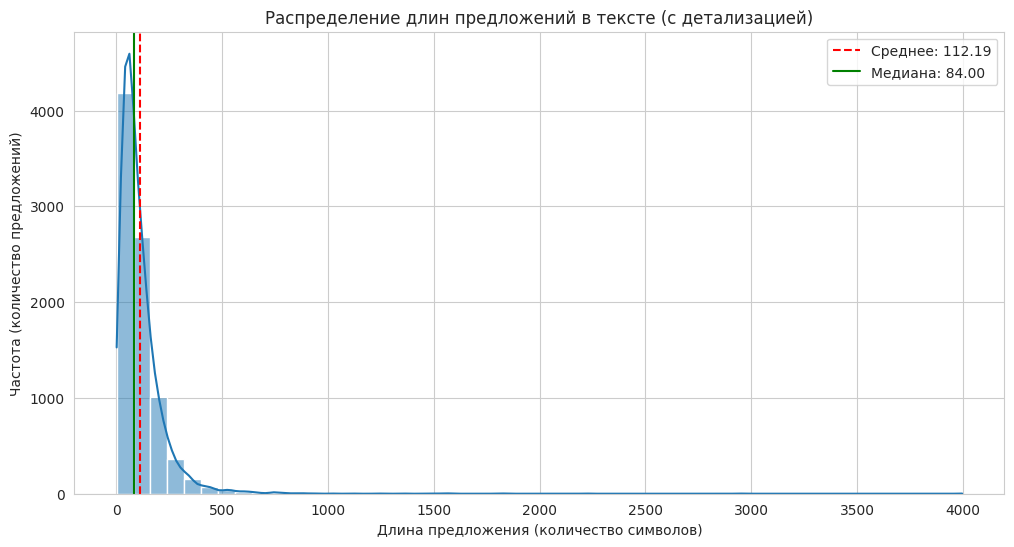

In [10]:
# 1. Рассчитываем статистики
mean_len = df['sentence_length'].mean()
median_len = df['sentence_length'].median()

print(f"Средняя длина предложения: {mean_len:.2f} символов")
print(f"Медианная длина предложения: {median_len:.2f} символов")

# 2. Строим график, как и раньше
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='sentence_length', bins=50, kde=True)

# 3. Добавляем вертикальные линии для среднего и медианы
plt.axvline(mean_len, color='red', linestyle='--', label=f'Среднее: {mean_len:.2f}')
plt.axvline(median_len, color='green', linestyle='-', label=f'Медиана: {median_len:.2f}')

# 4. Добавляем легенду, чтобы показать, что означает каждая линия
plt.legend()

plt.title('Распределение длин предложений в тексте (с детализацией)')
plt.xlabel('Длина предложения (количество символов)')
plt.ylabel('Частота (количество предложений)')
plt.show()